In [2]:
!unzip "/content/drive/MyDrive/Digitalxray.zip"

Archive:  /content/drive/MyDrive/Digitalxray.zip
  inflating: MedicalExpert-I/0Normal/NormalG0 (1).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (10).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (100).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (101).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (102).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (103).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (104).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (105).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (106).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (107).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (108).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (109).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (11).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (110).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (111).png  
  inflating: MedicalExpert-I/0Normal/NormalG0 (112).png  
  inflating: MedicalExpert-

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [4]:
# function to display images
def show_images(path):
    labels = list(os.listdir(path))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    random_indices = random.sample(range(1, 101), 10)

    for i, idx in enumerate(random_indices, 1):
        file_path = os.path.join(path, labels[idx])
        image = Image.open(file_path)
        subplot_row = (i - 1) // 5
        subplot_col = (i - 1) % 5
        axes[subplot_row, subplot_col].imshow(image)
        axes[subplot_row, subplot_col].axis('off')
    plt.tight_layout()
    plt.show()

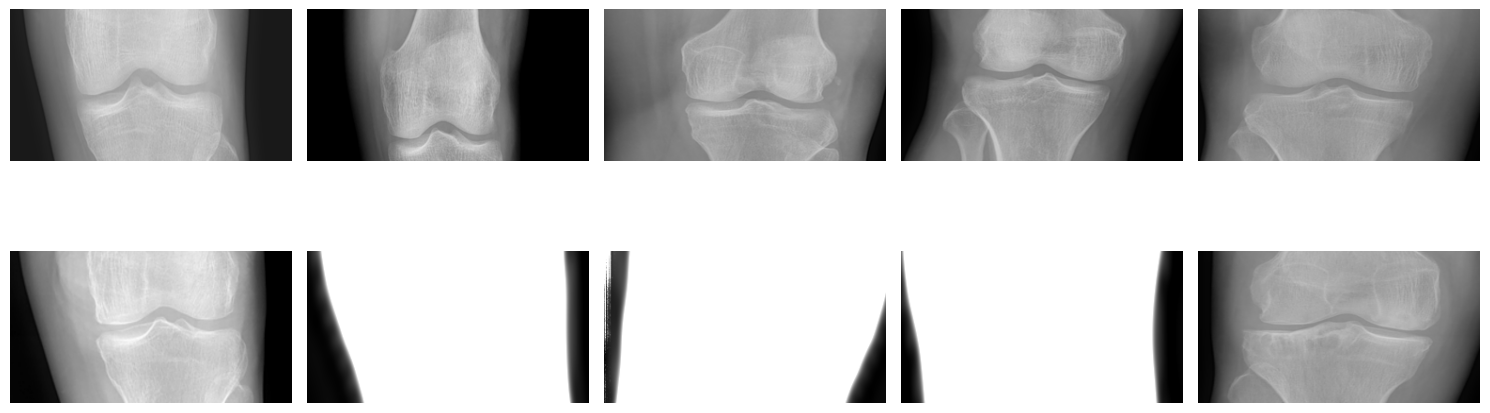

In [5]:
show_images('/content/MedicalExpert-I/0Normal')

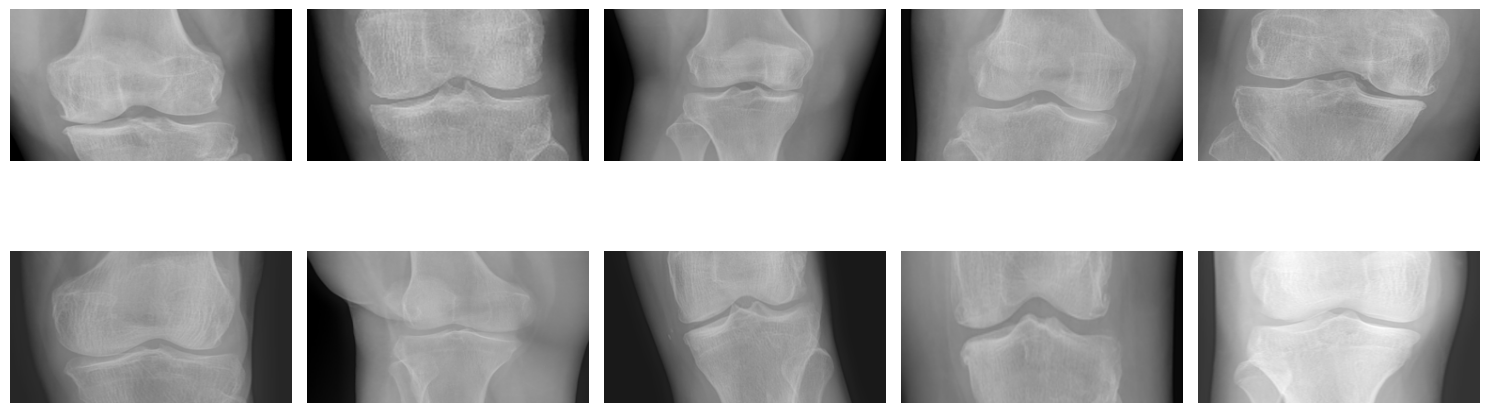

In [6]:
show_images('/content/MedicalExpert-I/1Doubtful')

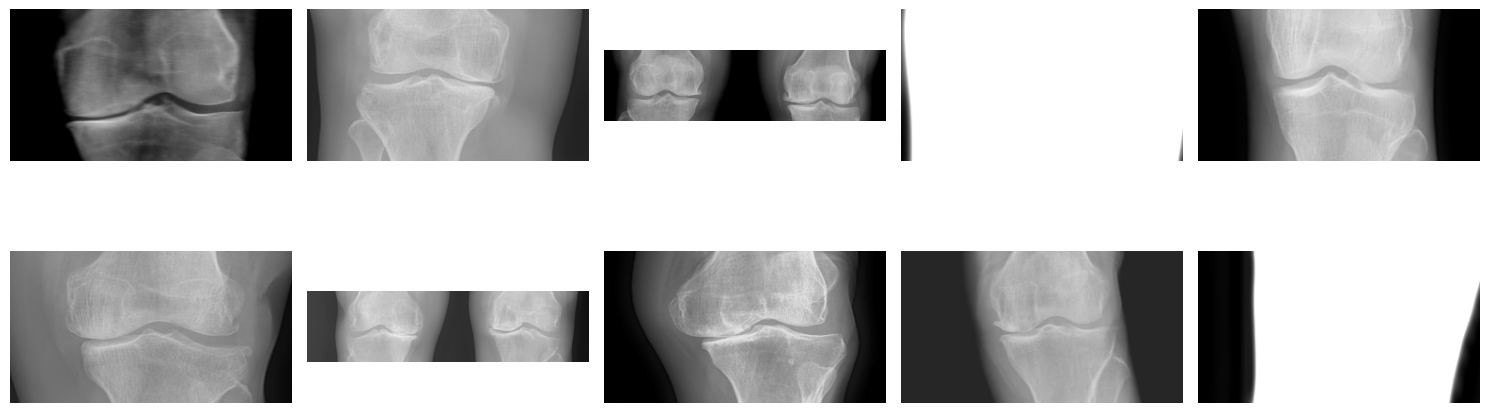

In [7]:
show_images('/content/MedicalExpert-I/2Mild')

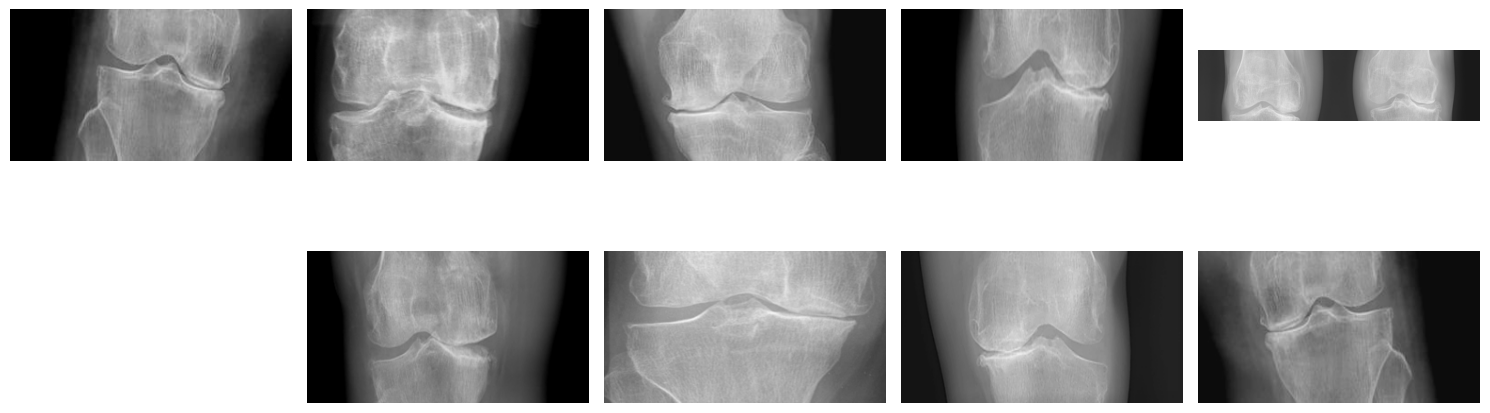

In [8]:
show_images('/content/MedicalExpert-I/3Moderate')

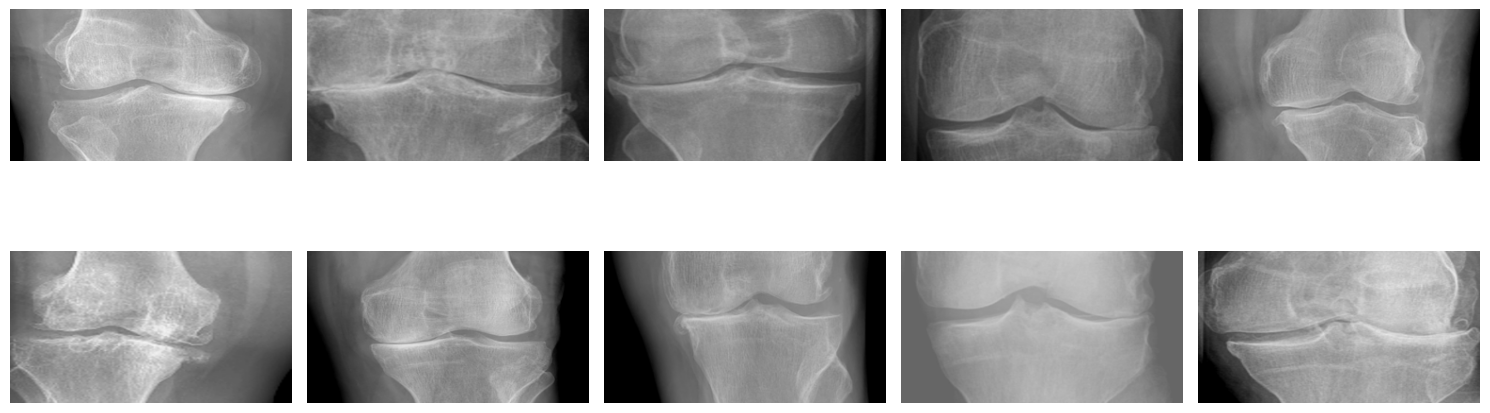

In [9]:
show_images('/content/MedicalExpert-I/4Severe')

In [10]:
# Reading and merging the data
def read_data(path,image_size,classes):
    X = []
    y = []
    gamma = 1.8
    labels = os.listdir(path)
    for label in labels:
        try:
            for image in os.listdir(path + '/' +label):
                img = cv2.imread(path + '/' +label + '/' + image)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img,(image_size, image_size))
                X.append(img)
                y.append(classes[label])
        except:
            pass
    return np.array(X), np.array(y)

In [11]:
knee2_classes = {'0Normal': 0, '1Doubtful' : 1, '2Mild' : 2, '3Moderate' : 3,'4Severe' : 4}
x_traindig_knee,y_traindig_knee = read_data('/content/MedicalExpert-I',200,knee2_classes)
x_testdig_knee,y_testdig_knee = read_data('/content/MedicalExpert-II',200,knee2_classes)
x_traindig_knee,y_traindig_knee = shuffle(x_traindig_knee,y_traindig_knee ,random_state = 42)
x_testdig_knee,y_testdig_knee = shuffle(x_testdig_knee,y_testdig_knee,random_state = 42)

In [12]:
x_knee = np.concatenate((x_traindig_knee,x_testdig_knee))
x_knee.shape

(3300, 200, 200)

In [13]:
y_knee = np.concatenate((y_traindig_knee,y_testdig_knee))
y_knee.shape

(3300,)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_knee,y_knee,test_size = 0.25,random_state = 42)

In [15]:
print(x_train.shape)
print(x_test.shape)

(2475, 200, 200)
(825, 200, 200)


In [16]:
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())
x_train = x_train / 255
x_test = x_test / 255
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train.shape

(2475, 5)

In [19]:
from keras.layers import *
img_input = Input(shape=(200,200, 1))
img_conc = Concatenate()([img_input, img_input, img_input])
Model4= InceptionResNetV2(input_tensor=img_conc, include_top=False)
#include_top=false removes the classification layer that was trained on ImageNet
#dataset
Model4.trainable=False #set the model as not trainable.
#preprocessing input
Model4.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 200, 200, 3)          0         ['input_1[0][0]',             
                                                                     'input_1[0][0]',             
                                                                     'input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 99, 99, 32)           864       ['concatenate[0][0]']         
             

In [20]:
Model4.trainable=True
set_trainable=False

for layer in Model4.layers:
  if layer.name=='conv2d_188':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in Model4.layers:
  print(layer.name,layer.trainable)

input_1 False
concatenate False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed_5b False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalizati

In [21]:
model = Sequential()

In [22]:
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(200, 200, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Model4)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 4, 4, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 24576)             0         
                                                                 
 dense (Dense)               (None, 256)               6291712   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

In [24]:
model.fit(x_train,y_train,epochs = 100,validation_data = (x_test,y_test))

Epoch 1/100
78/78 [==============================] - 50s 287ms/step - loss: 2.0177 - accuracy: 0.2606 - val_loss: 538.3708 - val_accuracy: 0.3176
Epoch 2/100
78/78 [==============================] - 17s 213ms/step - loss: 1.7565 - accuracy: 0.2788 - val_loss: 9.6307 - val_accuracy: 0.3176
Epoch 3/100
78/78 [==============================] - 16s 211ms/step - loss: 1.3941 - accuracy: 0.3051 - val_loss: 4.0366 - val_accuracy: 0.3491
Epoch 4/100
78/78 [==============================] - 17s 212ms/step - loss: 1.2376 - accuracy: 0.3729 - val_loss: 1.1694 - val_accuracy: 0.3467
Epoch 5/100
78/78 [==============================] - 15s 188ms/step - loss: 1.1515 - accuracy: 0.4069 - val_loss: 1.0970 - val_accuracy: 0.4521
Epoch 6/100
78/78 [==============================] - 16s 212ms/step - loss: 1.1032 - accuracy: 0.4820 - val_loss: 1.4723 - val_accuracy: 0.5042
Epoch 7/100
78/78 [==============================] - 16s 211ms/step - loss: 0.9993 - accuracy: 0.5875 - val_loss: 1.1662 - val_accurac

In [25]:
predictions = np.argmax(model.predict(x_test),1)

26/26 [==============================] - 7s 124ms/step


In [26]:
print("Target variable shape:", y_train.shape)
print("Model output shape:", model.output_shape)

Target variable shape: (2475, 5)
Model output shape: (None, 5)


In [27]:
y_train

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [28]:
ytrue = np.argmax(y_test,axis = 1)
print( confusion_matrix(y_true= ytrue,y_pred = predictions) )

[[237  25   0   0   0]
 [  3 217   4   2   4]
 [  0  10  95   6   6]
 [  0   0   2 111   0]
 [  0   4   4   4  91]]


In [29]:
print(classification_report(y_true= ytrue,y_pred = predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       262
           1       0.85      0.94      0.89       230
           2       0.90      0.81      0.86       117
           3       0.90      0.98      0.94       113
           4       0.90      0.88      0.89       103

    accuracy                           0.91       825
   macro avg       0.91      0.91      0.91       825
weighted avg       0.91      0.91      0.91       825



In [30]:
model.save('digitalkneeinceptionresnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
